### Partisan Division Over Environmental Policies in the US
##### This visualisation aims to replicate the [research](https://www.pewresearch.org/science/2017/05/16/public-divides-over-environmental-regulation-and-energy-policy/) on the US public's partisan division over environemntal policies by the Pew Research Centre in 2017. The original dataset can be accessed [here](https://www.pewresearch.org/science/dataset/may-3-7-2017-science-marches-and-environmentenergy-issues/), in which the research methodology and variable explanation are included.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patches
from matplotlib.ticker import MaxNLocator
from matplotlib.gridspec import GridSpec
import seaborn as sns

%matplotlib inline

In [2]:
# import the dataset
data = pd.read_spss('Data/Dataset_2017.sav')

In [3]:
# select the relevant variables. Variable meanings can be referred to the codebook in the 2017_Survey folder
data = data[['party','partyln', 'pew1a', 'pew1b', 'pew1c', 'pew1d', 'pew1e']]

In [4]:
# ensure that are no contradicting partisan preferences
condition1 = (data['party'] == 'Democratic') & (data['partyln'] == 'Republican')
condition2 = (data['party'] == 'Republican') & (data['partyln'] == 'Democratic')

number = data[condition1 | condition2].shape[0]

print(f"There are {number} cases where a person's partisan identification is contradicting their partisan inclination")

There are 0 cases where a person's partisan identification is contradicting their partisan inclination


In [5]:
# preprocess the partisan inclination variables
data[['party', 'partyln']] = data[['party', 'partyln']].applymap(lambda x: np.nan if x not in ['Democrat', 'Republican', 'Democratic'] else x)

#data['partyln'] = data['partyln'].fillna(data['party'])
data['party'] = data['party'].fillna(data['partyln'])


In [6]:
data['party'] = data['party'].apply(lambda x: 'Democrat' if x == 'Democratic' else x)

data.drop('partyln', axis = 1, inplace = True)

In [7]:
# the project only focuses on the 'top priority', encode to simplify the further operation
data[['pew1a', 'pew1b', 'pew1c', 'pew1d', 'pew1e']] = data[['pew1a', 'pew1b', 'pew1c', 'pew1d', 'pew1e']].applymap(lambda x: 1 if x == 'Top priority' else 0)

In [8]:
by_party = data.groupby('party')[['pew1a', 'pew1b', 'pew1c', 'pew1d', 'pew1e']].apply(lambda x: x.eq(1).sum() / x.count() * 100)

In [9]:
by_party[['pew1a', 'pew1b', 'pew1c', 'pew1d', 'pew1e']] = by_party[['pew1a', 'pew1b', 'pew1c', 'pew1d', 'pew1e']].applymap(lambda x: round(x))
by_party = by_party.reset_index()

In [10]:
by_party = by_party.melt(id_vars = ['party'], value_vars = ['pew1a', 'pew1b', 'pew1c', 'pew1d', 'pew1e'], var_name = 'issues', value_name = 'per')

In [11]:
by_party = by_party.pivot(index = 'issues', columns = 'party', values = 'per').reset_index()
by_party.columns.name = None

In [12]:
by_party['distance'] = abs(by_party['Democrat'] - by_party['Republican'])
by_party = by_party.sort_values(by = ['distance'], ascending = False)

by_party = by_party.reset_index(drop = True)

In [13]:
by_party['yaxis'] = range(10, 1, -2)
by_party['x_left'] = by_party[['Democrat', 'Republican']].min(axis = 1)
by_party['x_right'] = by_party[['Democrat', 'Republican']].max(axis = 1)

In [14]:
adult_avg = pd.DataFrame(data[['pew1a', 'pew1b', 'pew1c', 'pew1d', 'pew1e']].apply(lambda x: round(x.eq(1).sum() / x.count() * 100)), columns = ['per'])

/var/folders/2n/c8rdtv3n1n5bxg6yc7y92nqm0000gn/T/ipykernel_96685/3081731684.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ticklabels)


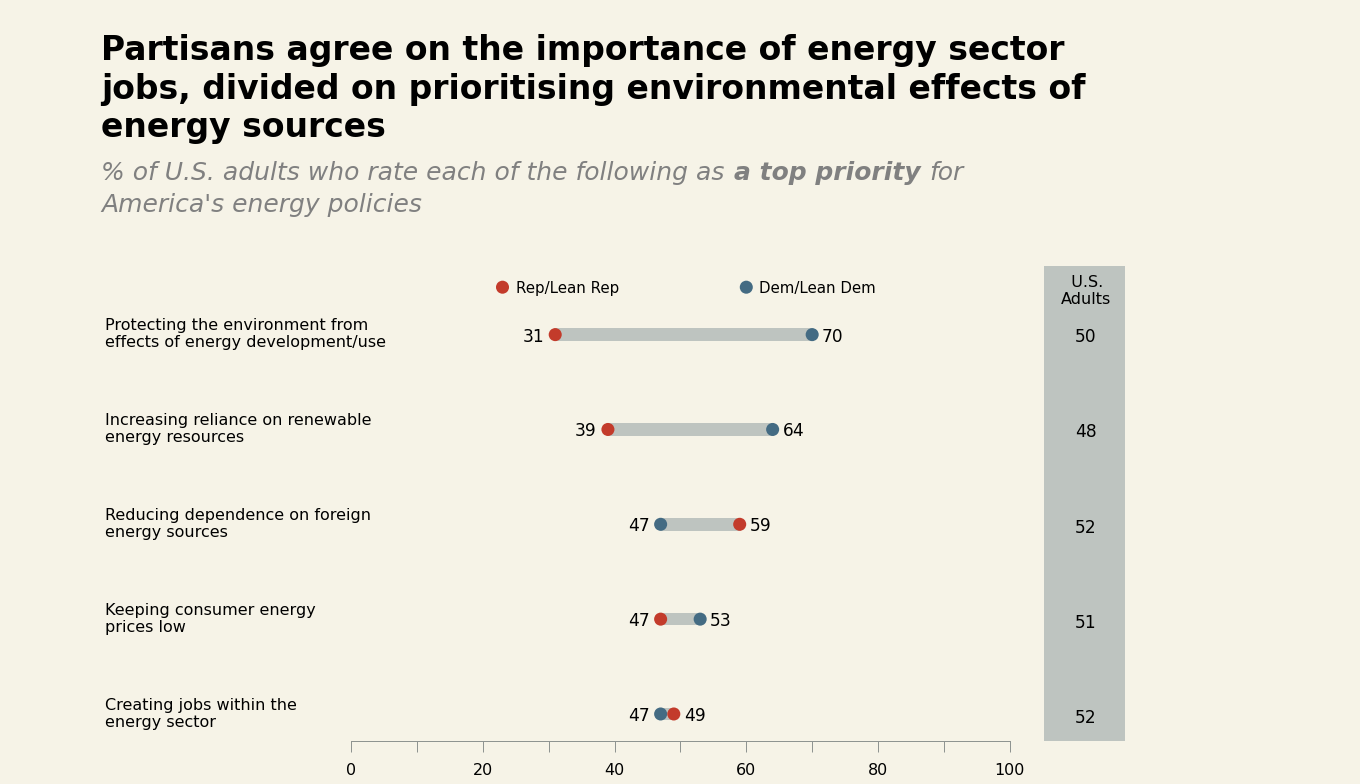

In [17]:
fig = plt.figure(figsize = (19, 11))
gs = GridSpec(6, 8, figure = fig)

fig.patch.set_facecolor('#f6f3e7')

# ax1 is the plot for partisan opinion division
ax1 = fig.add_subplot(gs[2:6, 2:6])

y_position = 9.89

# the area between two dots
for i, j in zip(by_party['x_left'], by_party['distance']):
    rect = patches.Rectangle((i, y_position), j, 0.22, linewidth = 2, color = '#bec4c0')
    ax1.add_patch(rect)

    y_position -= 2

# add dots
sns.scatterplot(data = by_party, x = 'Democrat', y = 'yaxis', s = 170, color = '#446b83', edgecolor = 'none', ax = ax1)
sns.scatterplot(data = by_party, x = 'Republican', y = 'yaxis', s = 170, color = '#c33b2b', edgecolor = 'none', ax = ax1)

# add legend
sns.scatterplot(x = [23], y = [11], s = 170, color = '#c33b2b', edgecolor = 'none',  ax = ax1)
ax1.text(25, 10.9, 'Rep/Lean Rep', size = 15)

sns.scatterplot(x = [60], y = [11], s = 170, color = '#446b83', edgecolor = 'none',  ax = ax1)
ax1.text(62, 10.9, 'Dem/Lean Dem', size = 15)

# add text
y_position_2 = 9.87

for i, j in zip(by_party['x_left'], by_party['x_right']):
    ax1.text(i - 5, y_position_2, i, size = 17)
    ax1.text(j + 1.5, y_position_2, j, size = 17)
    y_position_2 -= 2

ax1.set_xlim(0, 100)

ax1.yaxis.set_visible(False)
ax1.set_xlabel('')


ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

ax1.spines['bottom'].set_linewidth(1)
ax1.spines['bottom'].set_color('#8f9491')

# set ticks
ax1.tick_params(axis = 'x', size = 11, color = '#8f9491', labelsize = 16, labelcolor = 'black', pad = 10, width = 1)

ax1 = plt.gca()  # Get the current Axes instance
ax1.xaxis.set_major_locator(MaxNLocator(nbins=10)) 

ticklabels = []

for tick in range(0, 101, 20):
    ticklabels.append(tick)
    ticklabels.append(' ')

ax1.set_xticklabels(ticklabels)

#ax2 is for the title and the subtitle
ax2 = fig.add_subplot(gs[0:2, 0:8])

ax2.text(0.07, 0.4, 'Partisans agree on the importance of energy sector\njobs, divided on prioritising environmental effects of\nenergy sources', size = 33, weight = 'bold')
ax2.text(0.07, 0.2, '% of U.S. adults who rate each of the following as', size = 25, fontstyle = 'italic', color = 'gray')
ax2.text(0.54, 0.2, 'a top priority', size = 25, fontstyle = 'italic', color = 'gray', weight = 'bold')
ax2.text(0.685, 0.2, 'for', size = 25, fontstyle = 'italic', color = 'gray')
ax2.text(0.07, 0.05, "America's energy policies", size = 25, fontstyle = 'italic', color = 'gray')

for spine in ax2.spines.values():
    spine.set_visible(False)

ax2.yaxis.set_visible(False)
ax2.xaxis.set_visible(False)

# ax3 is for the text annotation for issues
ax3 = fig.add_subplot(gs[2:6, 0:3])

ax3.text(0.2, 0.83, 'Protecting the environment from\neffects of energy development/use', size = 16)
ax3.text(0.2, 0.63, 'Increasing reliance on renewable\nenergy resources', size = 16)
ax3.text(0.2, 0.43, 'Reducing dependence on foreign\nenergy sources', size = 16)
ax3.text(0.2, 0.23, 'Keeping consumer energy\nprices low', size = 16)
ax3.text(0.2, 0.03, 'Creating jobs within the\nenergy sector', size = 16)

for spine in ax3.spines.values():
    spine.set_visible(False)

ax3.yaxis.set_visible(False)
ax3.xaxis.set_visible(False)

#ax4 is the rectangle on the right
ax4 = fig.add_subplot(gs[2:6, 6:8])

rect_2 = patches.Rectangle((0.02, 0), 0.25, 1, linewidth = 2, color = '#bec4c0')
ax4.add_patch(rect_2)

for spine in ax4.spines.values():
    spine.set_visible(False)

y_position_3 = 0.84

for i in adult_avg['per']:
    ax4.text(0.115, y_position_3, i, size = 17)
    y_position_3 -= 0.2
    
ax4.text(0.07, 0.92, '  U.S.\nAdults', size = 16)

ax4.yaxis.set_visible(False)
ax4.xaxis.set_visible(False)

for i in [ax1, ax2, ax3, ax4]:
    i.set_facecolor('#f6f3e7')

plt.tight_layout()

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)

plt.show()